In [70]:
import pandas as pd
import seaborn as sns
import scipy.stats as sts
import matplotlib.pyplot as plt

Есть набор данных о видеоиграх.

Ответьте на следующие вопросы:

1) Как критики относятся к спортивным играм?    
2) Критикам нравятся больше игры на PC или на PS4?   
3) Критикам больше нравятся стрелялки или стратегии?   

Для каждого вопроса:

- сформулируйте нулевую и альтернативную гипотезы;   
- выберите пороговый уровень статистической значимости;   
- опишите полученные результаты статистического теста.   

**Загрузим датасет.**

In [31]:
df = pd.read_csv('video_games_sales.csv')
df.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg


**Посмотрим на пропуски.**

In [32]:
df.isnull().sum()

Rank                  0
Name                  0
basename              0
Genre                 0
ESRB_Rating       32169
Platform              0
Publisher             0
Developer            17
VGChartz_Score    55792
Critic_Score      49256
User_Score        55457
Total_Shipped     53965
Global_Sales      36377
NA_Sales          42828
PAL_Sales         42603
JP_Sales          48749
Other_Sales       40270
Year                979
Last_Update       46606
url                   0
status                0
Vgchartzscore     54993
img_url               0
dtype: int64

**Дла аналиа оставим только те данные, по которым были проставлены оценки.**

In [40]:
critic_score = df.dropna(subset=['Critic_Score'])

### **Вопрос 1.** Как критики относятся к спортивным играм?

**Сформируем датасет со спортивными играми.**

In [44]:
sports_game = critic_score[critic_score['Genre'] == 'Sports']
sports_game.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg
16,17,Wii Fit,wii-fit,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.9,...,NaN,NaN,NaN,NaN,2008.0,NaN,http://www.vgchartz.com/game/7480/wii-fit/?reg...,1,8.0,/games/boxart/full_3619557AmericaFrontccc.jpg
17,18,Wii Fit Plus,wii-fit-plus,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/35077/wii-fit-plu...,1,NaN,/games/boxart/full_2716475AmericaFrontccc.jpg
68,69,FIFA 18,fifa-18,Sports,E,PS4,EA Sports,EA Vancouver,NaN,8.3,...,1.27,8.64,0.15,1.73,2017.0,02nd Apr 18,http://www.vgchartz.com/game/180525/fifa-18/?r...,1,NaN,/games/boxart/full_5257064AmericaFrontccc.jpg


Обчно оценка от 7 (или 70) до 10 (или 100) говорит о достаточно успешном проекте. Таким оразом, если критик поставил оценку от 7 и выше то можно утверждать что игрой он доволен.

**Сформируем нулевую и альтернативную гипотезы.**

Н0 - Средняя оценка критика, поставленная игре в жанре Sport = 7.    
Н1 - Средняя оценка критика, поставленная игре в жанре Sport < 7.

Уровень статистической значисости возьмем 0.05

In [88]:
alpha = 0.05
res = sts.ttest_1samp(sports_game['Critic_Score'], 7.0)
print(res)
if (res.statistic < 0) & (res.pvalue / 2 < alpha):
    print('Отвергаем Н0. Средняя оценка критика меньше 7')
else:
    print('Не отвергаем Н0. Критикам нравятся спортивные игры')

Ttest_1sampResult(statistic=5.197156914436623, pvalue=2.671410902970997e-07)
Не отвергаем Н0. Критикам нравятся спортивные игры


Посмотрим на среднюю оценку.

In [58]:
sports_game['Critic_Score'].mean()

7.291424418604655

**Вывод** По результатм проведенного анализа с 95 процентной достоверностью можно утверждать, что критикам нравятся спортивные игры. Это подтверждается занчением p-value, а таже средней оценкой игр в данном жанре.

 ### **Вопрос 2.** Критикам нравятся больше игры на PC или на PS4?

In [59]:
pc = critic_score[critic_score['Platform'] == 'PC']
ps4 = critic_score[critic_score['Platform'] == 'PS4']

**Сформируем нулевую и альтернативную гипотезы.**

Н0 - Критикам одинаково нравятся игры на PC и PS4.    
Н1 - Критикам нравятся больше игры на какой то одной платформе из двух.

Уровень статистической значисости возьмем 0.05

In [67]:
alpha = 0.05
res = sts.ttest_ind(pc['Critic_Score'], ps4['Critic_Score'])
print(res)
if res.pvalue < alpha:
    print('Отвергаем Н0. Критикам нравятся больше игры на какой то одной платформе из двух.')
else:
    print('Не отвергаем Н0. Критикам одинаково нравятся игры на PC и PS4')

Ttest_indResult(statistic=-2.5145460239776942, pvalue=0.012079074209299238)
Отвергаем Н0. Критикам нравятся больше игры на какой то одной платформе из двух.


In [68]:
print(pc['Critic_Score'].mean(), ps4['Critic_Score'].mean())

7.541849710982658 7.904587155963299


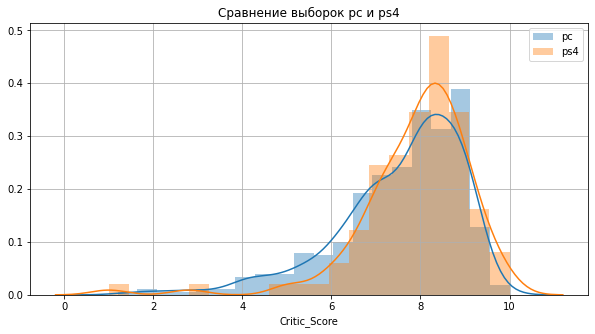

In [79]:
plt.figure(figsize=(10, 5))
sns.distplot(pc['Critic_Score'], 20)
sns.distplot(ps4['Critic_Score'], 20)
plt.title('Сравнение выборок pc и ps4')
plt.legend(['pc', 'ps4'])
plt.grid()

**Вывод** На основании проведенного анализа с 95 процентной достоверностью можно утверждать, что критикам в принципе нравятся игры больше на одной из двух платформ. При сравнении средних по двум выборкам видно, что критики отдают предпочтение играм PS4 (это не удивительно, так как PS4 славится своими экзами). Так же визуализировав данные видно, что средние значения у двух выборок также отличаются. У PS4 оно выше.

 ### **Вопрос 3.** Критикам больше нравятся стрелялки или стратегии?

In [83]:
set(critic_score['Genre'])

{'Action',
 'Action-Adventure',
 'Adventure',
 'Board Game',
 'Education',
 'Fighting',
 'MMO',
 'Misc',
 'Music',
 'Party',
 'Platform',
 'Puzzle',
 'Racing',
 'Role-Playing',
 'Sandbox',
 'Shooter',
 'Simulation',
 'Sports',
 'Strategy',
 'Visual Novel'}

In [84]:
shooter = critic_score[critic_score['Genre'] == 'Shooter']
strategy = critic_score[critic_score['Genre'] == 'Strategy']

**Сформируем нулевую и ильтернативную гипотезы**

Н0 - Критикам одинаково нравятся и шутеры и стратегии.    
Н1 - Критикам нравятся больше либо шутеры либо стратегии.

Уровень статистической значисости возьмем 0.05

In [91]:
alpha = 0.05
res = sts.ttest_ind(shooter['Critic_Score'], strategy['Critic_Score'])
print(res)
if res.pvalue < alpha:
    print('Отвергаем Н0. Критикам нравятся больше либо шутеры либо стратегии')
else:
    print('Не отвергаем Н0. Критикам одинаково нравятся как шутеры так и стратегии')

Ttest_indResult(statistic=-1.5618791808752566, pvalue=0.11857794193337436)
Не отвергаем Н0. Критикам одинаково нравятся как шутеры так и стратегии


In [92]:
print(shooter['Critic_Score'].mean(), strategy['Critic_Score'].mean())

7.2868327402135264 7.429268292682925


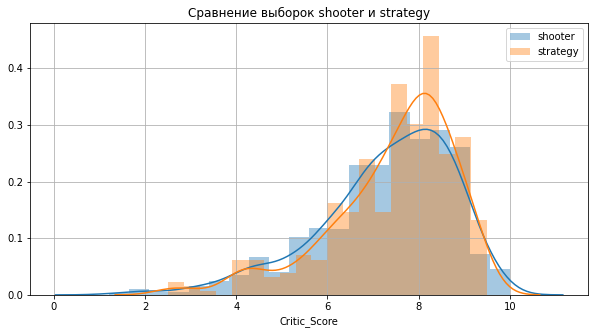

In [95]:
plt.figure(figsize=(10, 5))
sns.distplot(shooter['Critic_Score'], 20)
sns.distplot(strategy['Critic_Score'], 20)
plt.title('Сравнение выборок shooter и strategy')
plt.legend(['shooter', 'strategy'])
plt.grid()

**Вывод** На основании проведенного анализа с 95 процентной достоверностью можно утверждать, что критикам одиникого нравятся как шутеры так и стратегии. При сравнении средних по двум выборкам видно, что с разницой в 0.1 оценка шутеров выше, но так как p-value > alpha оснований для отклонения нулевой гипотесы у нас не достаточно. Так же визуализировав данные видно, что выборки примерно одинакого распределены.